In [1]:
# Masha M. Stephen
# WHO Suicide Dataset 
# Statistics and Visualization (Data Analysis)

In [2]:
#This dataset was necessary for me to write my Suicide in the Twenty-First Century piece.

#Looking at the data, you can observe long-time trends and differences between countries, as well as within countries across a few demographic groups - in both cases you will see that these differences may be very large.

#Content
#Basic aggregate numbers covering 1979-2016, by country, year, age groups and sex. There is only one file, with only a few columns. I made this file using the WHO Mortality Database online tool.

In [3]:
import pandas as pd 
import numpy as np

In [4]:
# WHO dataset
suicide = pd.read_csv("who_suicide_statistics.csv")
suicide.head(10)

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0
5,Albania,1985,female,75+ years,NaN,34200.0
6,Albania,1985,male,15-24 years,NaN,301400.0
7,Albania,1985,male,25-34 years,NaN,264200.0
8,Albania,1985,male,35-54 years,NaN,296700.0
9,Albania,1985,male,5-14 years,NaN,325800.0


In [5]:
suicide.tail(10)

,country,year,sex,age,suicides_no,population
43766,Zimbabwe,1990,female,35-54 years,45.0,NaN
43767,Zimbabwe,1990,female,5-14 years,6.0,NaN
43768,Zimbabwe,1990,female,55-74 years,20.0,NaN
43769,Zimbabwe,1990,female,75+ years,3.0,NaN
43770,Zimbabwe,1990,male,15-24 years,132.0,NaN
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [6]:
#statistic libraries for data analysis
from scipy.stats import trim_mean
from statsmodels import robust
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
suicide.dtypes

country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object

In [8]:
#looking at missing values 
missing_data = suicide.isnull()
missing_data.head(5)

,country,year,sex,age,suicides_no,population
0,False,False,False,False,True,False
1,False,False,False,False,True,False
2,False,False,False,False,True,False
3,False,False,False,False,True,False
4,False,False,False,False,True,False


In [9]:
#a general count of missing data
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print(" ")

country
False    43776
Name: country, dtype: int64
 
year
False    43776
Name: year, dtype: int64
 
sex
False    43776
Name: sex, dtype: int64
 
age
False    43776
Name: age, dtype: int64
 
suicides_no
False    41520
True      2256
Name: suicides_no, dtype: int64
 
population
False    38316
True      5460
Name: population, dtype: int64
 


In [10]:
suicide = suicide.dropna()
suicide.head(10)

,country,year,sex,age,suicides_no,population
24,Albania,1987,female,15-24 years,14.0,289700.0
25,Albania,1987,female,25-34 years,4.0,257200.0
26,Albania,1987,female,35-54 years,6.0,278800.0
27,Albania,1987,female,5-14 years,0.0,311000.0
28,Albania,1987,female,55-74 years,0.0,144600.0
29,Albania,1987,female,75+ years,1.0,35600.0
30,Albania,1987,male,15-24 years,21.0,312900.0
31,Albania,1987,male,25-34 years,9.0,274300.0
32,Albania,1987,male,35-54 years,16.0,308000.0
33,Albania,1987,male,5-14 years,0.0,338200.0


In [11]:
#changing suicide number and population to 
suicide['suicides_no'] = suicide['suicides_no'].astype(int)
suicide['population'] = suicide['population'].astype(int)
suicide.dtypes

country        object
year            int64
sex            object
age            object
suicides_no     int32
population      int32
dtype: object

In [12]:
# statistics
# finding mean, median, and std for suicide number by sex
print('The average suicide number weighted by population is ', np.average(suicide['suicides_no'], weights = suicide['population']))
#suicde median
print('The suicide number median is ', suicide['suicides_no'].median())
# suicide std
print('The suicide number std is ', suicide['suicides_no'].std())

The average suicide number weighted by population is  1359.4607412821913
The suicide number median is  21.0
The suicide number std is  855.4494423899025


In [13]:
# suicides percentiles
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
df = pd.DataFrame(suicide['suicides_no'].quantile(percentages))
df.index = [f'{p * 100}%' for p in percentages]
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
suicides_no   0.0    2.0   21.0  116.0  961.0


In [14]:
# finding the max suicide_ number
print(max(suicide['suicides_no']))

22338


In [15]:
#finding that row with higher suicides
suicide.loc[suicide['suicides_no'].idxmax()]

country        Russian Federation
year                         1994
sex                          male
age                   35-54 years
suicides_no                 22338
population               19044200
Name: 33128, dtype: object

In [16]:
# finding the min suicides
print(min(suicide['suicides_no']))

0


In [17]:
#rows with min suicides
suicide.loc[suicide['suicides_no'].idxmin()]

country           Albania
year                 1987
sex                female
age            5-14 years
suicides_no             0
population         311000
Name: 27, dtype: object

In [18]:
suicide['age']

24       15-24 years
25       25-34 years
26       35-54 years
27        5-14 years
28       55-74 years
            ...     
43759    25-34 years
43760    35-54 years
43761     5-14 years
43762    55-74 years
43763      75+ years
Name: age, Length: 36060, dtype: object

<AxesSubplot:>

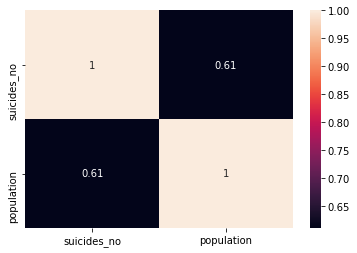

In [19]:
# correlation of gendger by suicide number 
#correlation of country by suiciice number
# correlation of age by suicide number
cols = ['suicides_no', 'population']
corr_matrix = suicide.loc[:, cols].corr()
sns.heatmap(corr_matrix, annot=True)

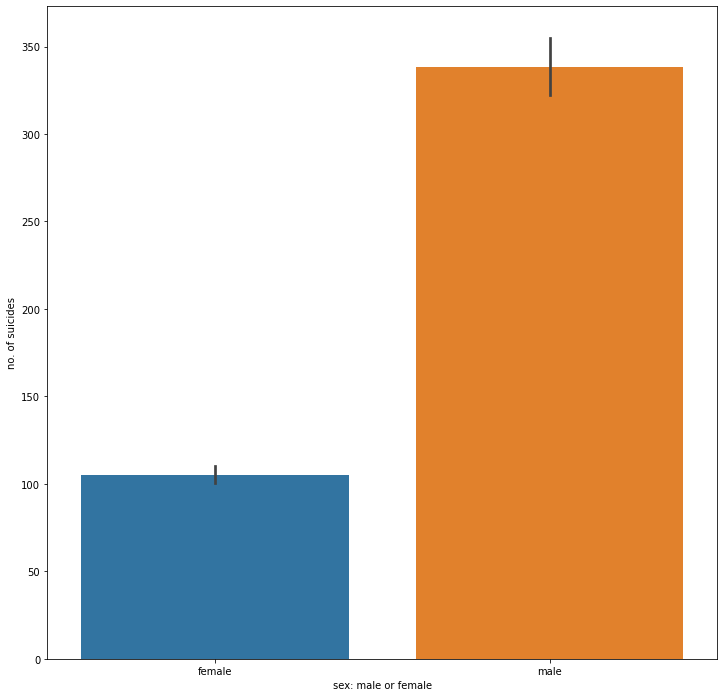

In [20]:
#male vs female suicides
plt.figure(figsize =(12,12))
sns.barplot(suicide['sex'], suicide['suicides_no'])
plt.xlabel('sex: male or female')
plt.ylabel('no. of suicides')
plt.show()

<AxesSubplot:ylabel='country,age'>

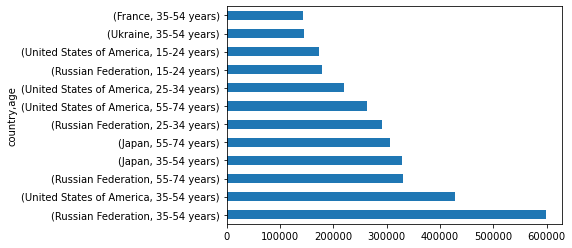

In [21]:
#countries and suicide numbers
suicide.groupby(['country', 'age']).suicides_no.sum().nlargest(12).plot(kind='barh')

In [22]:
piv = suicide.groupby(['age', 'sex', 'country']).agg({'suicides_no' :np.sum}).unstack()
piv
# you can access each country suicides from piv dataframe

suicides_no                                              \
country                Albania Antigua and Barbuda Argentina Armenia Aruba   
age         sex                                                              
15-24 years female         253                   0      4579      57     3   
            male           293                   0     14513     183     7   
25-34 years female         139                   0      3101      95     4   
            male           288                   1     11998     312    25   
35-54 years female         173                   0      6086     183     8   
            male           418                   6     19218     656    40   
5-14 years  female          21                   0       661       8     1   
            male            40                   0       920      19     0   
55-74 years female          68                   1      5348     222     6   
            male           196                   3     18281     457    20   
75+ years   female          39                   0      1616      90     2   
            male            42                   0      7541     140     4   

                                                                 ...         \
country            Australia Austria Azerbaijan Bahamas Bahrain  ... Turkey   
age         sex                                                  ...          
15-24 years female      2512    1066        170       3      17  ...    724   
            male       10380    4528        450      19      37  ...   1458   
25-34 years female      3355    1529        185       4      35  ...    467   
            male       13918    6022        467      21     182  ...   1613   
35-54 years female      6870    4870        273       6      27  ...    699   
            male       22558   14833        862      39     146  ...   2605   
5-14 years  female       124      63         19       0       1  ...    140   
            male         239     152         65       2       3  ...    150   
55-74 years female      3762    5243        241       3       0  ...    379   
            male       11447   11862        446       9      15  ...   1334   
75+ years   female      1256    3379        103       0       0  ...    160   
            male        3858    6632         85       1       0  ...    402   

                                                                             \
country            Turkmenistan Ukraine United Arab Emirates United Kingdom   
age         sex                                                               
15-24 years female          993    4696                   29           3379   
            male           2004   25884                   75          14112   
25-34 years female          501    6591                   43           5992   
            male           1956   50273                  214          24672   
35-54 years female          450   21287                   19          15470   
            male           2399  122995                  216          48615   
5-14 years  female           82     462                    2            112   
            male            181    1697                    0            177   
55-74 years female          293   25991                    5          13156   
            male            613   76080                   18          26723   
75+ years   female           95   12582                    0           5270   
            male             77   16632                    1           8636   

                                                                \
country            United States of America Uruguay Uzbekistan   
age         sex                                                  
15-24 years female                    28372     371       4537   
            male                     143849    1536       7133   
25-34 years female                    41872     386       2712   
            male                     177341    1754       8124   
35-54 years fe

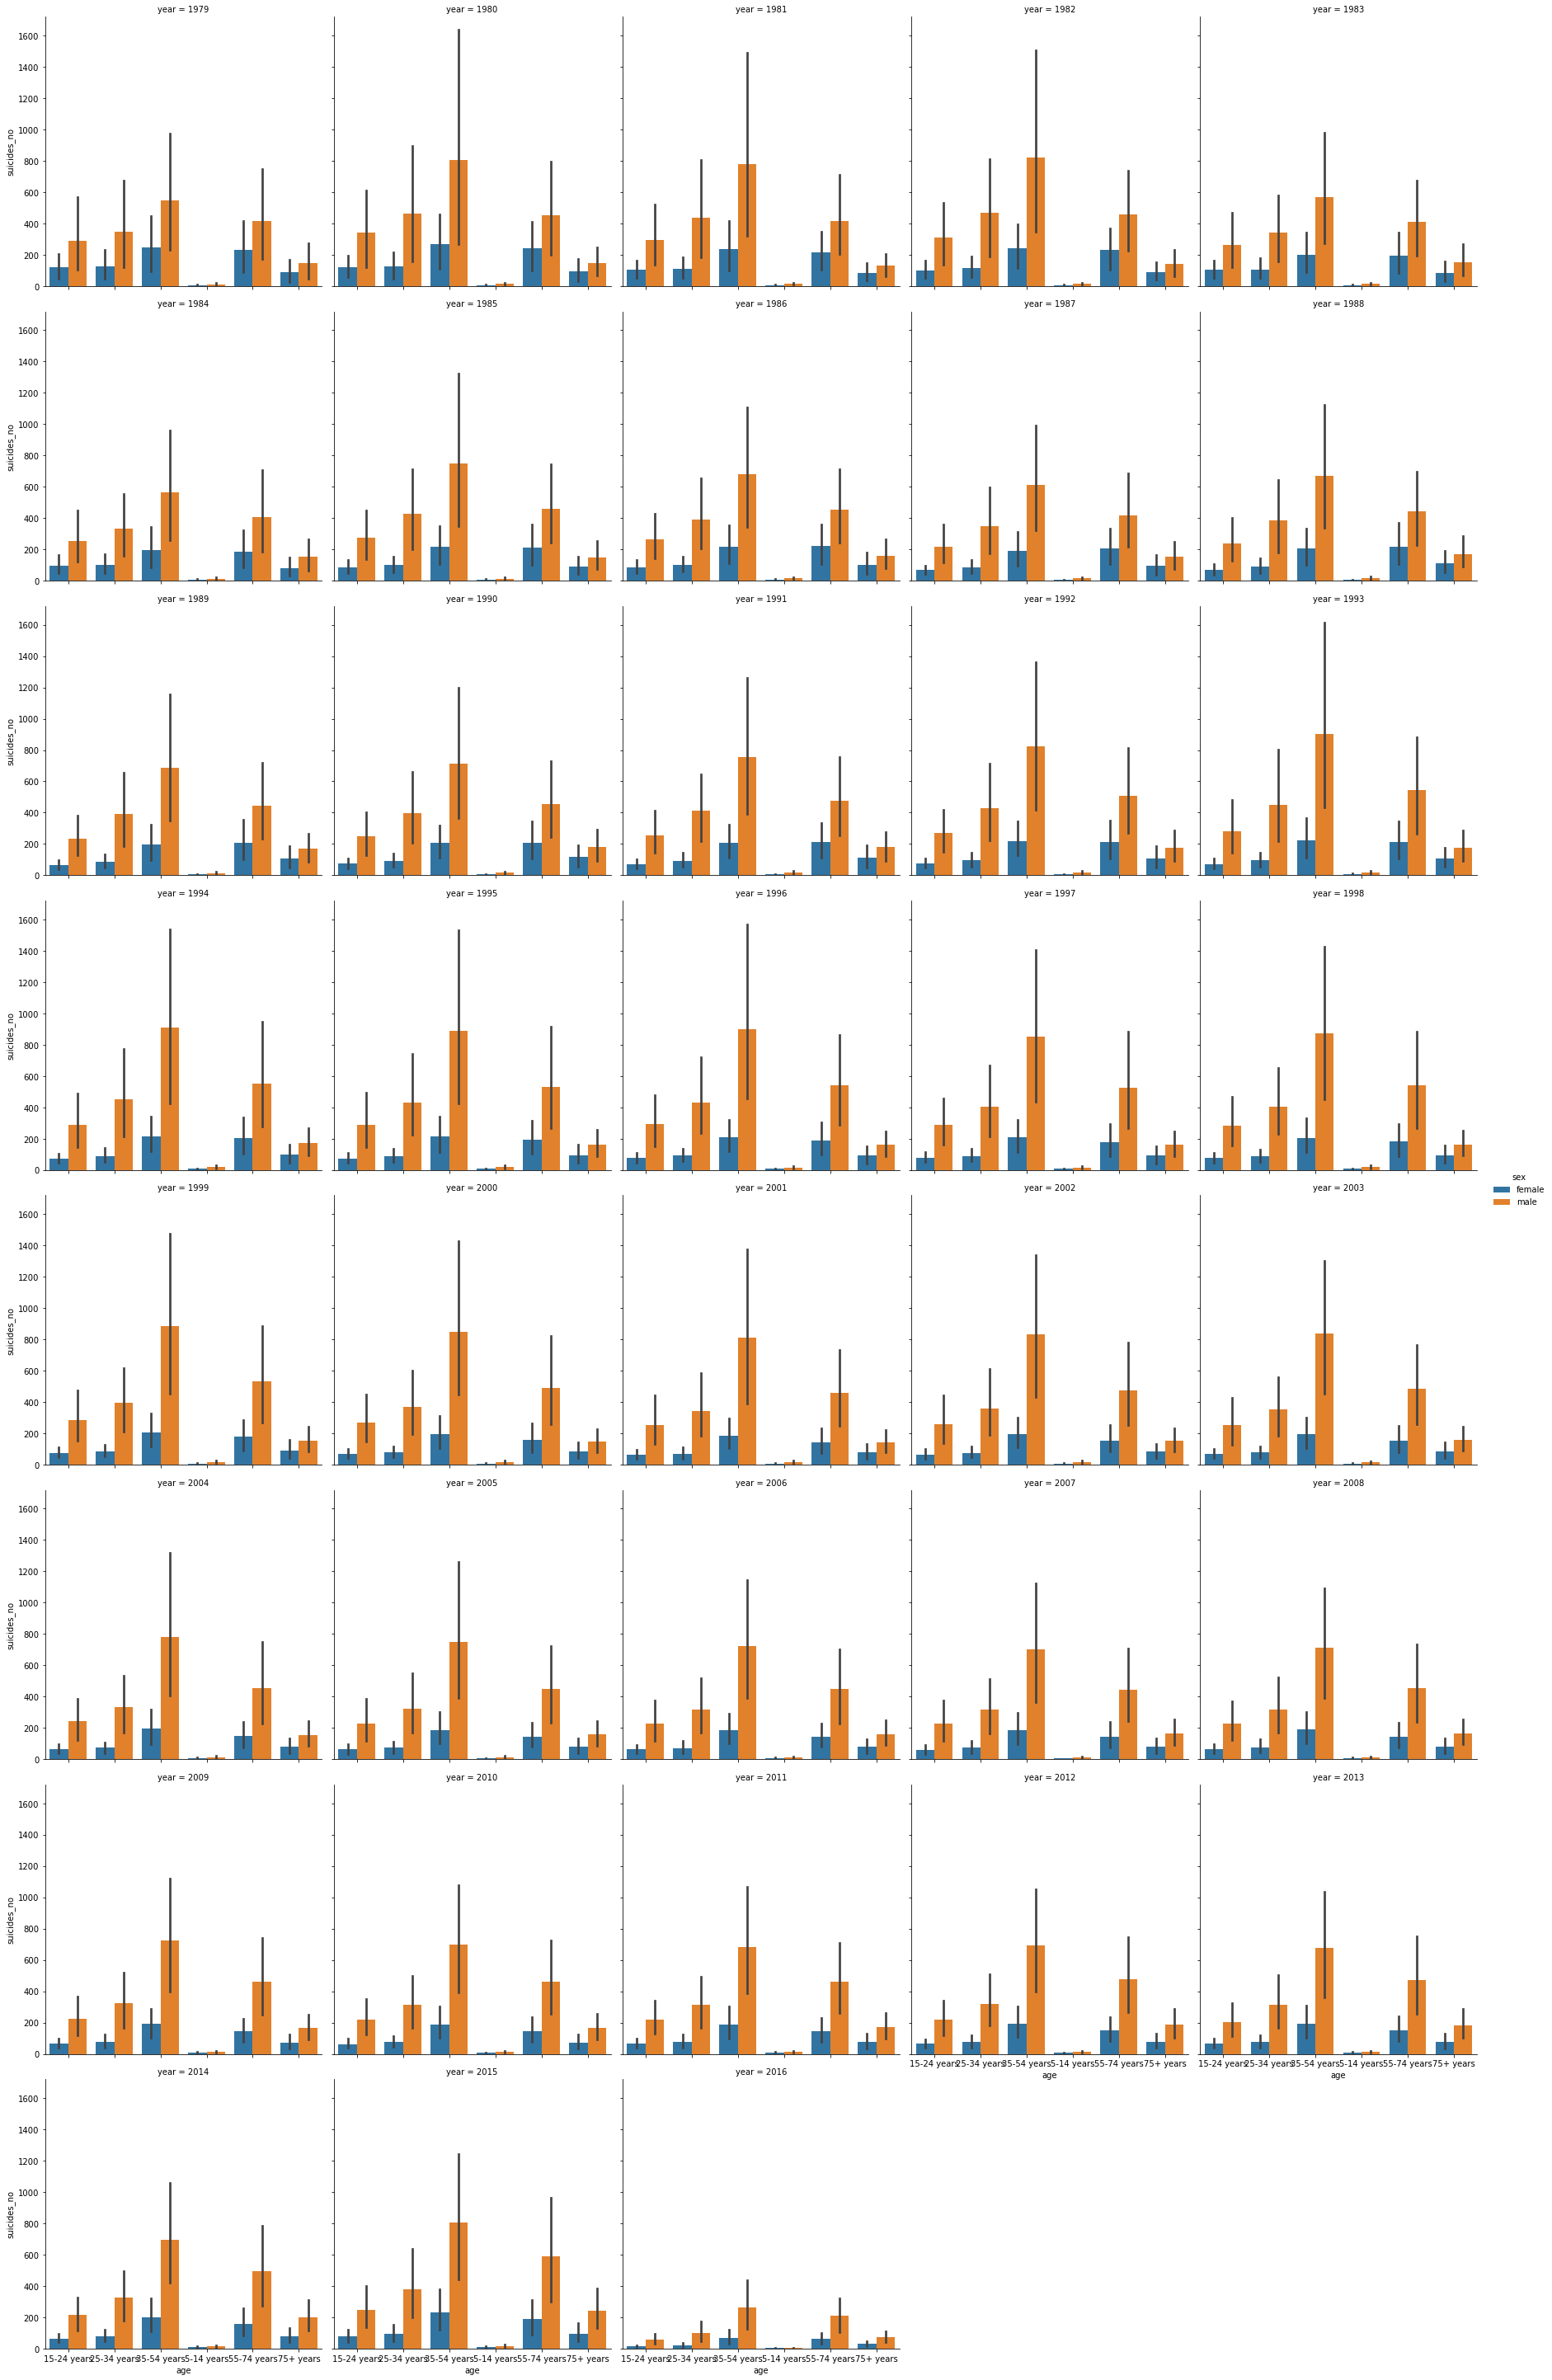

In [23]:
#bar plot
g = sns.catplot(x='age',
y= 'suicides_no',
hue = 'sex',
col = 'year',
col_wrap = 5,
data = suicide,
kind = 'bar')
g

<AxesSubplot:ylabel='country'>

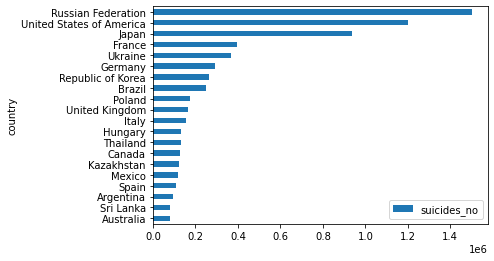

In [24]:
# countries leading in suicides
suicide.groupby('country')['suicides_no'].sum().reset_index().sort_values('suicides_no', ascending = True).tail(20).plot(x='country', y = 'suicides_no', kind = 'barh')